**Hệ thống Phát hiện Bắt Nạt Trực Tuyến: Học Máy và Phân tích Văn Bản**

**A**
 1. Xác Định Vấn Đề
- Mục tiêu: Phát hiện các bình luận hoặc tin nhắn có chứa ngôn ngữ bạo lực, xúc phạm, hoặc quấy rối.
- Yêu cầu: Định nghĩa các yêu cầu cụ thể của hệ thống, bao gồm các loại hành vi bắt nạt cần phát hiện và các tiêu chí đánh giá hiệu suất của mô hình.
 2. Thu Thập Dữ Liệu
- Nguồn dữ liệu:
  - Dữ liệu huấn luyện: Thu thập dữ liệu từ trang kaggle "https://www.kaggle.com/datasets/sayankr007/cyber-bullying-data-for-multi-label-classification/data?select=final_hateXplain.csv"
Dưới đây là một tóm tắt về các bước tiền xử lý dữ liệu, trực quan hóa, và học máy được thực hiện trong mã của bạn mà không cần ghi lại mã:

### **Tiền xử lý Dữ liệu**
1. **Chuyển đổi văn bản thành chữ thường**: Đảm bảo tất cả các từ đều ở dạng chữ thường để tránh phân biệt giữa chữ hoa và chữ thường.
2. **Loại bỏ ký tự đặc biệt và placeholder**: Xóa các ký tự không cần thiết hoặc placeholder từ văn bản để chuẩn bị dữ liệu sạch cho mô hình.
3. **Xử lý giá trị thiếu**: Thay thế các giá trị thiếu trong cột văn bản và nhãn bằng các giá trị mặc định để đảm bảo tính đầy đủ của dữ liệu.

### **Trực Quan Hóa Dữ Liệu**
1. **Biểu đồ tròn**: Hiển thị phân phối các nhãn tổng thể và phân phối các nhãn theo giới tính như "Women" và "No_gender". Giúp hiểu sự phân bố các loại nhãn trong dữ liệu.
2. **Biểu đồ nhiệt (Heatmap)**: Hiển thị phân phối nhãn theo chủng tộc, giúp phân tích mối quan hệ giữa chủng tộc và các nhãn phân loại.

### **Học Máy**
1. **Xây dựng mô hình học máy**:
   - **Naive Bayes**: Phương pháp phân loại dựa trên xác suất, thường được sử dụng cho văn bản.
   - **SVM (Support Vector Machine)**: Phương pháp phân loại mạnh mẽ với khả năng tìm ranh giới phân lớp tốt nhất.
   - **Random Forest**: Mô hình ensemble sử dụng nhiều cây quyết định để cải thiện độ chính xác và giảm overfitting.

2. **Huấn luyện và đánh giá mô hình**: Huấn luyện các mô hình trên dữ liệu huấn luyện và đánh giá hiệu suất của chúng trên dữ liệu kiểm tra để chọn mô hình tốt nhất dựa trên độ chính xác và các chỉ số phân loại.

3. **Dự đoán với mô hình tốt nhất**: Sử dụng mô hình học máy tốt nhất để dự đoán nhãn cho các bình luận mới và kiểm tra hiệu suất của mô hình trên dữ liệu chưa thấy trước đó.



In [1]:
# Kết nối google Drive với google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Tải DataFrame lên google colab

In [2]:
# Import các thư viện
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tệp csv
data_1 = pd.read_csv("/content/drive/MyDrive/Hoc may va ung dung/Doan/final_hateXplain.csv")

# In ra 8 dòng đầu tiên, Kiểm tra thông tin cơ bản của data_1 với các cột được sắp xếp và không có index khi chưa tiền sử lý
print(data_1.head(8).to_string(index = False))
print(data_1.info())

                                                                                                                                                                                                                                                                                        comment      label      Race     Religion    Gender Sexual Orientation Miscellaneous
                                                                                                                                                                                                                                                                 0 u0 lmao wow fuck you too 😂 😂     normal   No_race Nonreligious No_gender     No_orientation           NaN
                                                                         1 0 th floor maybe wow cnn with the fakenews the body count is going to be waay bad too but we can all go home now they have the white ar <number> toting suicide shooter with huge drum mags dead on

Tiền sử lý dữ liệu

In [3]:
# Import các thư viện
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import re

In [4]:
# Hàm tiền xử lý văn bản
def preprocess_text(text):
    text = text.lower()  # Chuyển văn bản về chữ thường
    text = re.sub(r'<number>', '', text)  # Loại bỏ placeholder <number>
    text = re.sub(r'[^\w\s]', '', text)  # Loại bỏ ký tự đặc biệt
    return text

In [5]:
# Xử lý giá trị NaN
data_1.fillna({'comment': 'None', 'label': 'unknown'}, inplace=True)

# Áp dụng tiền xử lý cho cột 'comment'
data_1['comment'] = data_1['comment'].apply(preprocess_text)

In [6]:
# Tiền xử lý văn bản
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data_1['comment'])

In [7]:
# Mã hóa nhãn
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data_1['label'])

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Kiểm tra lại thông tin sau khi tiền xử lý
print(data_1.info())

# In ra 10 dòng đầu tiên của DataFrame đã xử lý
print(data_1.head(10).to_string(index=False))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20109 entries, 0 to 20108
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comment             20109 non-null  object
 1   label               20109 non-null  object
 2   Race                20109 non-null  object
 3   Religion            20109 non-null  object
 4   Gender              20109 non-null  object
 5   Sexual Orientation  20109 non-null  object
 6   Miscellaneous       3533 non-null   object
dtypes: object(7)
memory usage: 1.1+ MB
None
                                                                                                                                                                                                                                                                                      comment      label      Race     Religion    Gender Sexual Orientation Miscellaneous
                                                    

Trực quan hóa dữ liệu

In [9]:
!pip install pandas matplotlib seaborn


Sử dụng biểu đồ tròn(pie chart) để phân tích và trực quan hóa các loại nhãn trong dữ liệu dựa trên phân nhóm giới tính.

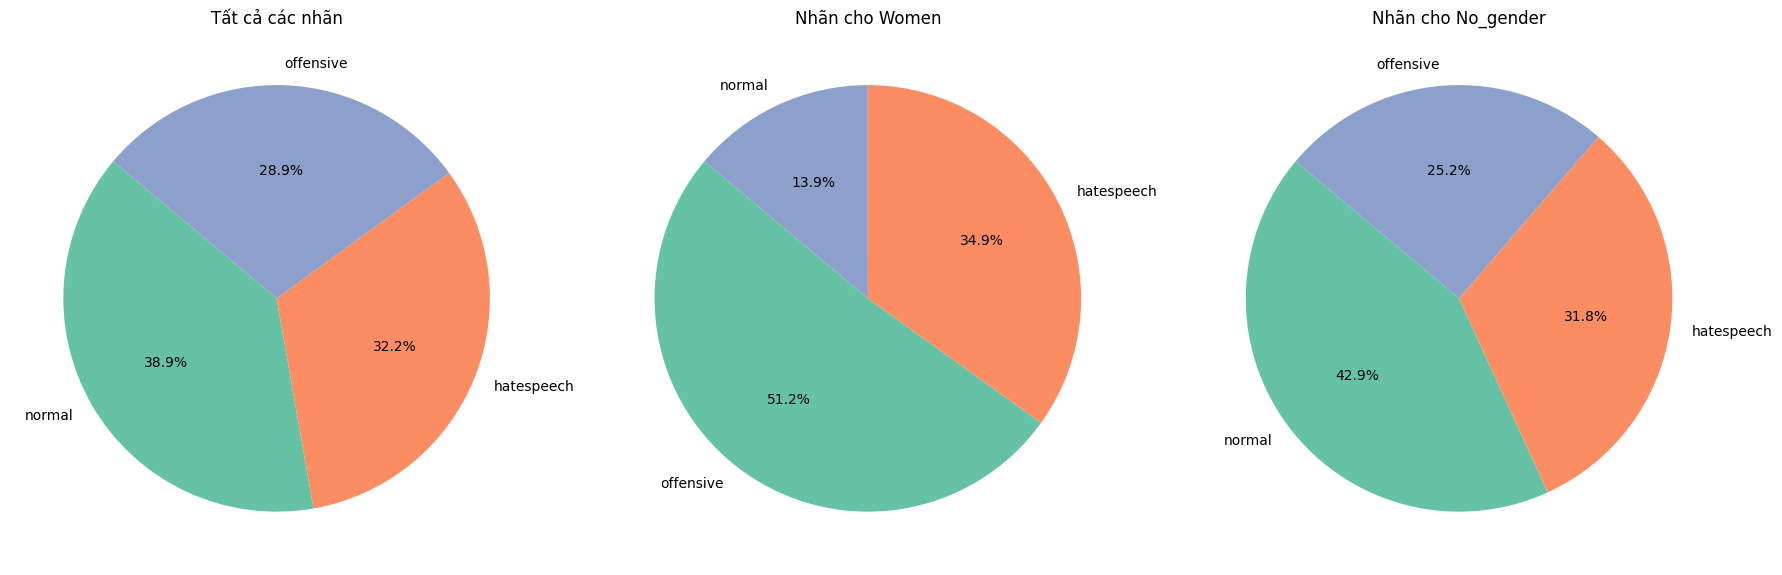

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
# Đếm số lượng các nhãn
label_counts = data_1['label'].value_counts()

# Đếm số lượng các nhãn theo giới tính
label_counts_women = data_1[data_1['Gender'] == 'Women']['label'].value_counts()
label_counts_no_gender = data_1[data_1['Gender'] == 'No_gender']['label'].value_counts()

# Hàm để vẽ biểu đồ tròn
def plot_pie(ax, data, title):
    labels, sizes = data.index, data.values
    colors = plt.get_cmap('Set2').colors  # Sử dụng bảng màu 'Set2'
    ax.pie(sizes, labels=labels, colors=colors[:len(labels)], autopct='%1.1f%%', startangle=140)
    ax.set_title(title)

# Tạo một hình với 3 biểu đồ con
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
# Biểu đồ tròn cho tất cả các nhãn
plot_pie(axs[0], label_counts, 'Tất cả các nhãn')
# Biểu đồ tròn cho nhãn theo giới tính 'Women'
plot_pie(axs[1], label_counts_women, 'Nhãn cho Women')
# Biểu đồ tròn cho nhãn theo giới tính 'No_gender'
plot_pie(axs[2], label_counts_no_gender, 'Nhãn cho No_gender')
# Hiển thị đồ thị
plt.tight_layout()
plt.show()

Biểu đồ nhiệt (heatmap) phân phối của các loại nhãn (labels) theo các nhóm chủng tộc (races)

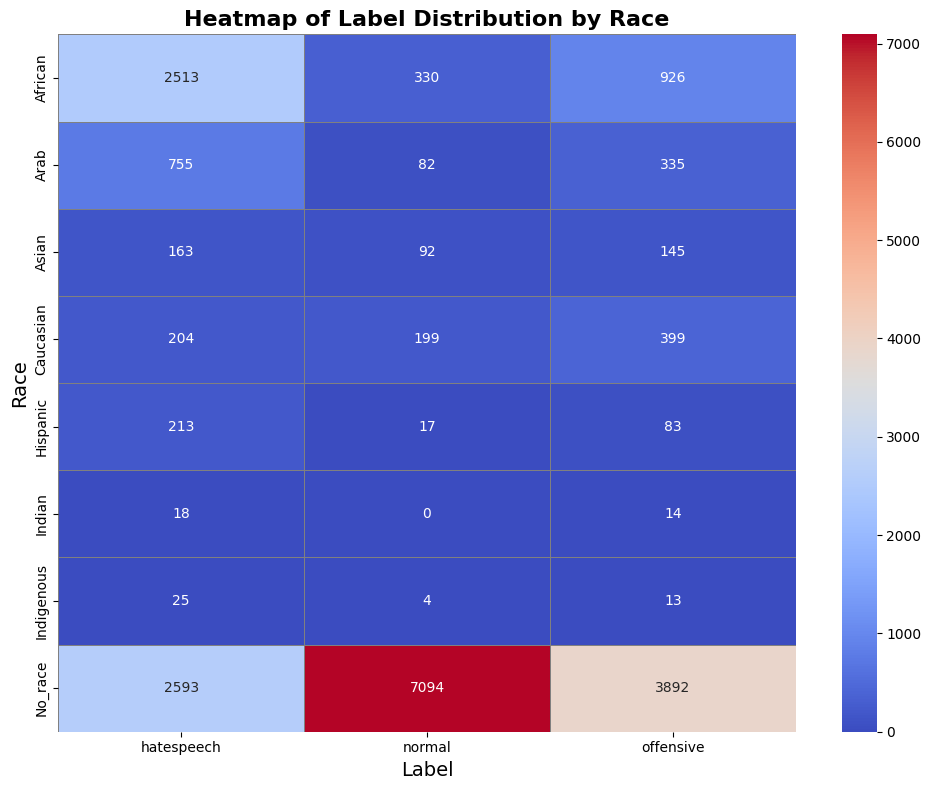

In [11]:
import seaborn as sns
# Tạo bảng phân phối chéo
cross_tab = pd.crosstab(data_1['Race'], data_1['label'])

# Thiết lập cấu hình đồ thị
plt.figure(figsize=(10, 8))

# Vẽ biểu đồ nhiệt với bảng màu đẹp và chú thích
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt='d', linewidths=0.5, linecolor='gray')

# Thêm tiêu đề và nhãn trục
plt.title('Heatmap of Label Distribution by Race', fontsize=16, fontweight='bold')
plt.xlabel('Label', fontsize=14)
plt.ylabel('Race', fontsize=14)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


 Xây dựng Mô Hình

In [12]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Tạo các mô hình
models = {
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(kernel='linear', probability=True),
    'Random Forest': RandomForestClassifier()
}

# Huấn luyện và đánh giá các mô hình
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)

    # Dự đoán
    y_pred = model.predict(X_test)

    # Đánh giá
    print(f"Results for {name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))
    print("="*50)


Training Naive Bayes...
Results for Naive Bayes:
Accuracy: 0.5808055693684734
              precision    recall  f1-score   support

           0       0.66      0.63      0.64      1325
           1       0.54      0.86      0.66      1502
           2       0.60      0.17      0.27      1195

    accuracy                           0.58      4022
   macro avg       0.60      0.56      0.53      4022
weighted avg       0.60      0.58      0.54      4022

Training SVM...
Results for SVM:
Accuracy: 0.6287916459472899
              precision    recall  f1-score   support

           0       0.73      0.67      0.70      1325
           1       0.61      0.76      0.68      1502
           2       0.54      0.41      0.46      1195

    accuracy                           0.63      4022
   macro avg       0.62      0.62      0.61      4022
weighted avg       0.63      0.63      0.62      4022

Training Random Forest...
Results for Random Forest:
Accuracy: 0.6300348085529587
              pr

 Đánh Giá Mô Hình

In [24]:
# Sử dụng mô hình tốt nhất cho dự đoán
# Chọn mô hình Naive Bayes
best_model_name = 'Naive Bayes'  # Tên của mô hình Naive Bayes
best_model = models[best_model_name]

# Dự đoán trên dữ liệu kiểm tra
y_pred_test = best_model.predict(X_test)

# Đánh giá mô hình
print(f"Best Model: {best_model_name}")
print(f"Accuracy on Test Data: {accuracy_score(y_test, y_pred_test)}")
print(classification_report(y_test, y_pred_test))


Best Model: Naive Bayes
Accuracy on Test Data: 0.5808055693684734
              precision    recall  f1-score   support

           0       0.66      0.63      0.64      1325
           1       0.54      0.86      0.66      1502
           2       0.60      0.17      0.27      1195

    accuracy                           0.58      4022
   macro avg       0.60      0.56      0.53      4022
weighted avg       0.60      0.58      0.54      4022



Dự đoán và Phân Tích

In [27]:
# Dự đoán cho các văn bản mới
def predict_new_comments(new_comments):
    new_comments_processed = [preprocess_text(comment) for comment in new_comments]
    X_new = vectorizer.transform(new_comments_processed)
    predictions = best_model.predict(X_new)
    return label_encoder.inverse_transform(predictions)

# Ví dụ dự đoán
new_comments = [
  "I really liked this event, it was amazing!",
  "You're a shit eating dog",
  "You should go back to your country.",
  "You're a bastard",
  "You should follow Buddhism"
]

predictions = predict_new_comments(new_comments)
for comment, pred in zip(new_comments, predictions):
    print(f"Comment: {comment}\nPrediction: {pred}\n")


Comment: I really liked this event, it was amazing!
Prediction: normal

Comment: You're a shit eating dog
Prediction: hatespeech

Comment: You should go back to your country.
Prediction: normal

Comment: You're a bastard
Prediction: hatespeech

Comment: You should follow Buddhism
Prediction: normal

